In [16]:
###visualizaci{on del embedding space del VAE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import  PCA
from mpl_toolkits.mplot3d import Axes3D
import librosa.display

In [13]:
####Visualización de los datos previo al VAE
with open('''waveforms.pkl''', 'rb') as f:
  waveforms = pickle.load(f)

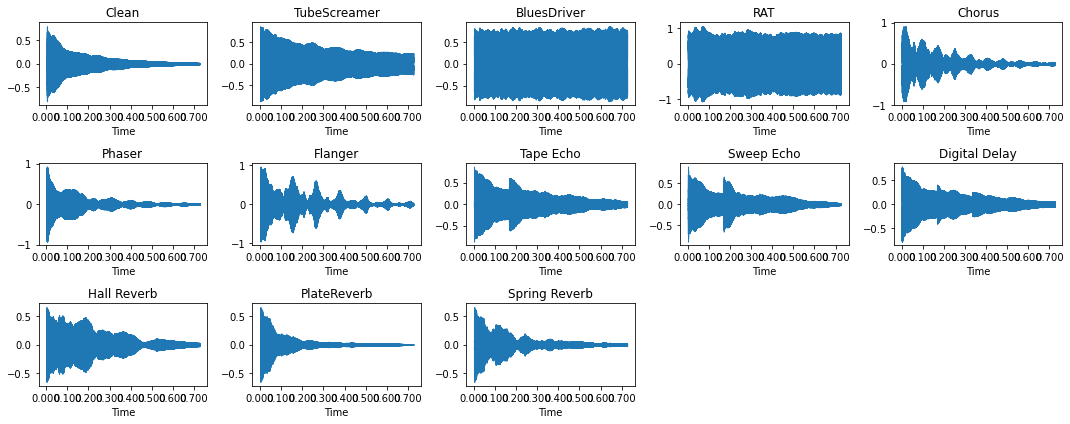

In [17]:

####visualización de los audios antes de normalizar
plt.figure(figsize=(15, 6))
sonidos = [i * 690 for i in range(13)]
for i, x in enumerate(sonidos):
    plt.subplot(3, 5, i+ 1).set_title(fx[i])
    ##esta linea la cambie pero recuerda que es waveform(localmente mi version de librosa funciona diff)
    librosa.display.waveshow(waveforms[x])
plt.tight_layout()
#plt.title("Waveforms")
plt.show()

In [18]:
#######PCA dominio de la frecuencia ####
fft_pca = []
for i in waveforms:
  x_fft = np.fft.fft(i)
  x_fft = librosa.amplitude_to_db(np.abs(i))
  fft_pca.append(x_fft)

fft_pca = np.array(fft_pca)

mu_fft = np.mean(fft_pca, axis = 0)
Xmu_fft = fft_pca - mu_fft
s_fft = np.std(fft_pca, axis = 0)
Xmu_FFT = Xmu_fft/s_fft

/var/folders/qs/3zzqvkk15cx77yqry0yt8x8h0000gn/T/ipykernel_11770/2850066909.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


variance: 
[0.4851443  0.02558836 0.00787432]


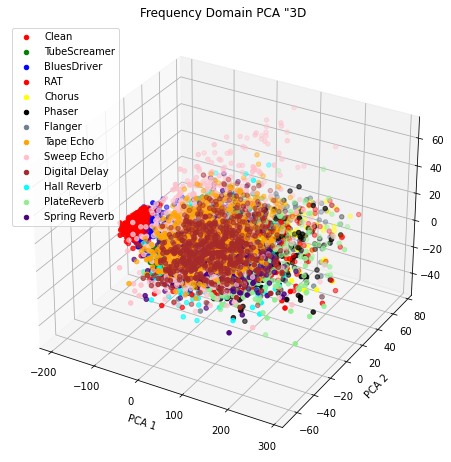

In [23]:
###visualización PCA
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(Xmu_FFT)
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='red', label= fx[0])
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='green', label= fx[1])
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='blue', label= fx[2])
ax.scatter3D(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1],X_PCA[2070:2759, 2], c='red', label= fx[3])
ax.scatter3D(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1],X_PCA[2760:3449, 2], c='yellow', label= fx[4])
ax.scatter3D(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1],X_PCA[3450:4139, 2], c='black', label= fx[5])
ax.scatter3D(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1],X_PCA[4140:4829, 2], c='slategrey', label= fx[6])
ax.scatter3D(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1],X_PCA[4830:5519, 2], c='orange', label= fx[7])
ax.scatter3D(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1],X_PCA[5520:6209, 2], c='pink', label= fx[8])
ax.scatter3D(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1],X_PCA[6210:6899, 2], c='brown', label= fx[9])
ax.scatter3D(X_PCA[6900:7589, 0], X_PCA[6900:7589, 1],X_PCA[6900:7589, 2], c='cyan', label= fx[10])
ax.scatter3D(X_PCA[7590:8279, 0], X_PCA[7590:8279, 1],X_PCA[7590:8279, 2], c='lightgreen', label= fx[11])
ax.scatter3D(X_PCA[8280:, 0], X_PCA[8280:, 1],X_PCA[8280:, 2], c='indigo', label= fx[12])
fig.add_axes(ax)

plt.legend()
plt.title('Frequency Domain PCA "3D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

variance: 
[0.4851443  0.02558834]


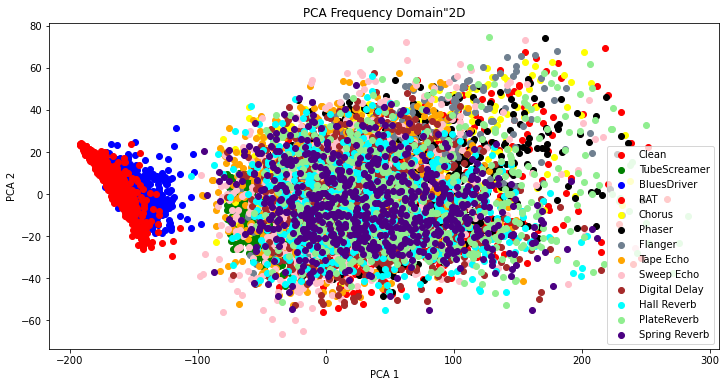

In [24]:
fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(Xmu_FFT)
print('variance: ')
print(pca.explained_variance_ratio_)

# "transform" the data that you want to reduce to "two components"
plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='red', label= fx[0])
plt.scatter(X_PCA[690:1379, 0], X_PCA[690:1379, 1], c='green', label= fx[1])
plt.scatter(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1], c='blue', label= fx[2])
plt.scatter(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1], c='red', label= fx[3])
plt.scatter(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1], c='yellow', label= fx[4])
plt.scatter(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1], c='black', label= fx[5])
plt.scatter(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1], c='slategrey', label= fx[6])
plt.scatter(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1], c='orange', label= fx[7])
plt.scatter(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1], c='pink', label= fx[8])
plt.scatter(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1], c='brown', label= fx[9])
plt.scatter(X_PCA[6900:7589, 0], X_PCA[6900:7589, 1], c='cyan', label= fx[10])
plt.scatter(X_PCA[7590:8279, 0], X_PCA[7590:8279, 1], c='lightgreen', label= fx[11])
plt.scatter(X_PCA[8280:, 0], X_PCA[8280:, 1], c='indigo', label= fx[12])

plt.legend()
plt.title('PCA Frequency Domain"2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

/var/folders/qs/3zzqvkk15cx77yqry0yt8x8h0000gn/T/ipykernel_11770/2964274464.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


variance: 
[0.4851443  0.02558835 0.00787432]


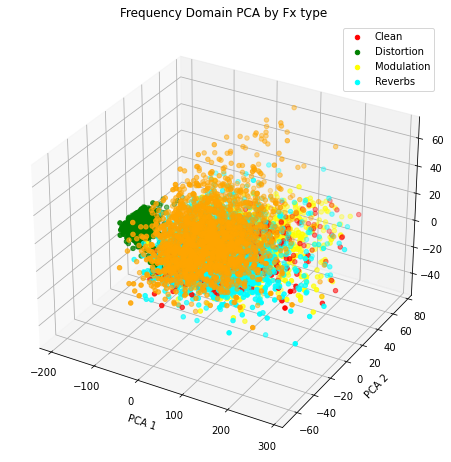

In [25]:
###visualización PCA
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(Xmu_FFT)
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='red', label= fx[0])
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='green', label= 'Distortion')
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='green')#, label= 'Distortion')
ax.scatter3D(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1],X_PCA[2070:2759, 2], c='green')#, label= 'Distortion')
ax.scatter3D(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1],X_PCA[2760:3449, 2], c='yellow', label= 'Modulation')
ax.scatter3D(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1],X_PCA[3450:4139, 2], c='yellow')#, label= 'Modulation')
ax.scatter3D(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1],X_PCA[4140:4829, 2], c='yellow')#, label= 'Modulation')
ax.scatter3D(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1],X_PCA[4830:5519, 2], c='orange')#, label= 'Delays')
ax.scatter3D(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1],X_PCA[5520:6209, 2], c='orange')#, label= 'Delays')
ax.scatter3D(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1],X_PCA[6210:6899, 2], c='orange')#, label= 'Delays')
ax.scatter3D(X_PCA[6900:7589, 0], X_PCA[6900:7589, 1],X_PCA[6900:7589, 2], c='cyan', label= 'Reverbs')
ax.scatter3D(X_PCA[7590:8279, 0], X_PCA[7590:8279, 1],X_PCA[7590:8279, 2], c='cyan')#, label= 'Reverbs')
ax.scatter3D(X_PCA[8280:, 0], X_PCA[8280:, 1],X_PCA[8280:, 2], c='cyan')# label= 'Reverbs')

plt.legend()
plt.title('Frequency Domain PCA by Fx type')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

/var/folders/qs/3zzqvkk15cx77yqry0yt8x8h0000gn/T/ipykernel_11770/2441094338.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


NameError: name 'Xw' is not defined

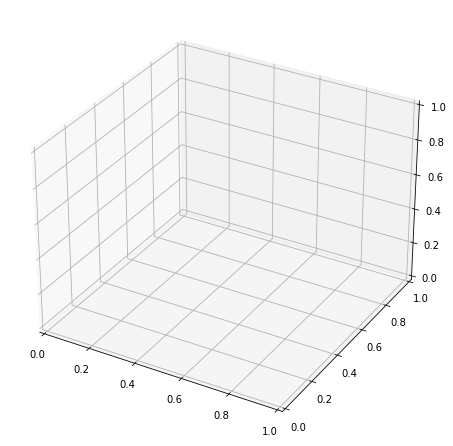

In [26]:
'''''''''
###visualización PCA
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(Xw)

print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='red', label= fx[0])
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='green', label= fx[1])
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='blue', label= fx[2])
ax.scatter3D(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1],X_PCA[2070:2759, 2], c='red', label= fx[3])
ax.scatter3D(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1],X_PCA[2760:3449, 2], c='yellow', label= fx[4])
ax.scatter3D(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1],X_PCA[3450:4139, 2], c='black', label= fx[5])
ax.scatter3D(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1],X_PCA[4140:4829, 2], c='slategrey', label= fx[6])
ax.scatter3D(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1],X_PCA[4830:5519, 2], c='orange', label= fx[7])
ax.scatter3D(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1],X_PCA[5520:6209, 2], c='pink', label= fx[8])
ax.scatter3D(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1],X_PCA[6210:6899, 2], c='brown', label= fx[9])
ax.scatter3D(X_PCA[6900:7589, 0], X_PCA[6900:7589, 1],X_PCA[6900:7589, 2], c='cyan', label= fx[10])
ax.scatter3D(X_PCA[7590:8279, 0], X_PCA[7590:8279, 1],X_PCA[7590:8279, 2], c='lightgreen', label= fx[11])
ax.scatter3D(X_PCA[8280:, 0], X_PCA[8280:, 1],X_PCA[8280:, 2], c='indigo', label= fx[12])
plt.legend()
plt.title('Analisis de componentes Principales "3D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [5]:
sr16k = 16000
fx = ["Clean", "TubeScreamer", "BluesDriver", "RAT", "Chorus", "Phaser", "Flanger", "Tape Echo","Sweep Echo", "Digital Delay", "Hall Reverb", "PlateReverb", "Spring Reverb"]

In [1]:
import pickle
with open('''latent_space_data.pkl''', 'rb') as f:
  latent = pickle.load(f)

/Users/mezaga93/tensorflow_train/env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mezaga93/tensorflow_train/env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


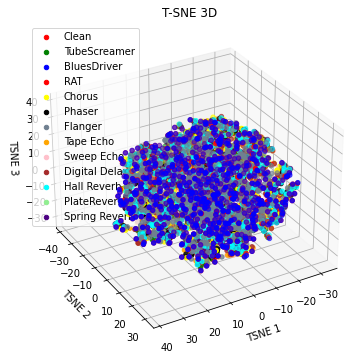

In [12]:
##ploting latent space with T-SNE
from sklearn.manifold import TSNE 

fig = plt.figure(1, figsize=(12, 6))
#a3x = Axes3D(fig,elev=-20, azim=100)
tsne = TSNE(n_components= 3)  # create an instance of t-SNE
ax = plt.axes(projection = "3d")
X_PCA = tsne.fit_transform(latent[0])  # fit and transform the data
ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='red', label= fx[0])
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='green', label= fx[1])
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='blue', label= fx[2])
ax.scatter3D(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1],X_PCA[2070:2759, 2], c='red', label= fx[3])
ax.scatter3D(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1],X_PCA[2760:3449, 2], c='yellow', label= fx[4])
ax.scatter3D(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1],X_PCA[3450:4139, 2], c='black', label= fx[5])
ax.scatter3D(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1],X_PCA[4140:4829, 2], c='slategrey', label= fx[6])
ax.scatter3D(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1],X_PCA[4830:5519, 2], c='orange', label= fx[7])
ax.scatter3D(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1],X_PCA[5520:6209, 2], c='pink', label= fx[8])
ax.scatter3D(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1],X_PCA[6210:6899, 2], c='brown', label= fx[9])
ax.scatter3D(X_PCA[6900:7589, 0], X_PCA[6900:7589, 1],X_PCA[6900:7589, 2], c='cyan', label= fx[10])
ax.scatter3D(X_PCA[7590:8279, 0], X_PCA[7590:8279, 1],X_PCA[7590:8279, 2], c='lightgreen', label= fx[11])
ax.scatter3D(X_PCA[8280:, 0], X_PCA[8280:, 1],X_PCA[8280:, 2], c='indigo', label= fx[12])
ax.view_init(30,60)
plt.title('T-SNE 3D')
ax.set_xlabel('TSNE 1')
ax.set_ylabel('TSNE 2')
ax.set_zlabel('TSNE 3')
ax.legend()
plt.show()

/var/folders/qs/3zzqvkk15cx77yqry0yt8x8h0000gn/T/ipykernel_11770/3983062862.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig,elev=-0, azim=0)


variance: 
[0.04787926 0.03444485 0.02742765]


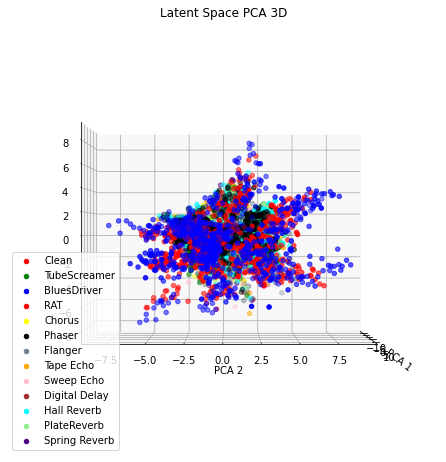

In [6]:
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig,elev=-0, azim=0)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

X_PCA = pca.fit_transform(latent[0])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='red', label= fx[0])
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='green', label= fx[1])
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='blue', label= fx[2])
ax.scatter3D(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1],X_PCA[2070:2759, 2], c='red', label= fx[3])
ax.scatter3D(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1],X_PCA[2760:3449, 2], c='yellow', label= fx[4])
ax.scatter3D(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1],X_PCA[3450:4139, 2], c='black', label= fx[5])
ax.scatter3D(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1],X_PCA[4140:4829, 2], c='slategrey', label= fx[6])
ax.scatter3D(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1],X_PCA[4830:5519, 2], c='orange', label= fx[7])
ax.scatter3D(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1],X_PCA[5520:6209, 2], c='pink', label= fx[8])
ax.scatter3D(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1],X_PCA[6210:6899, 2], c='brown', label= fx[9])
ax.scatter3D(X_PCA[6900:7589, 0], X_PCA[6900:7589, 1],X_PCA[6900:7589, 2], c='cyan', label= fx[10])
ax.scatter3D(X_PCA[7590:8279, 0], X_PCA[7590:8279, 1],X_PCA[7590:8279, 2], c='lightgreen', label= fx[11])
ax.scatter3D(X_PCA[8280:, 0], X_PCA[8280:, 1],X_PCA[8280:, 2], c='indigo', label= fx[12])

plt.legend()
plt.title('Latent Space PCA 3D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
#plt.zlabel('PCA 3')

plt.show()

variance: 
[0.04787924 0.03444485]


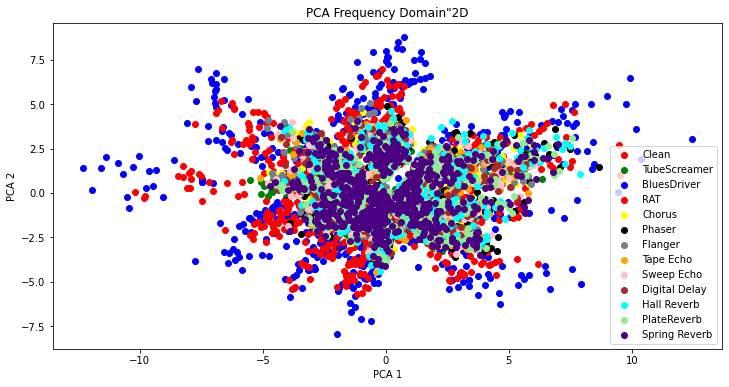

In [9]:
fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0])
print('variance: ')
print(pca.explained_variance_ratio_)

# "transform" the data that you want to reduce to "two components"
plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='red', label= fx[0])
plt.scatter(X_PCA[690:1379, 0], X_PCA[690:1379, 1], c='green', label= fx[1])
plt.scatter(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1], c='blue', label= fx[2])
plt.scatter(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1], c='red', label= fx[3])
plt.scatter(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1], c='yellow', label= fx[4])
plt.scatter(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1], c='black', label= fx[5])
plt.scatter(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1], c='slategrey', label= fx[6])
plt.scatter(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1], c='orange', label= fx[7])
plt.scatter(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1], c='pink', label= fx[8])
plt.scatter(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1], c='brown', label= fx[9])
plt.scatter(X_PCA[6900:7589, 0], X_PCA[6900:7589, 1], c='cyan', label= fx[10])
plt.scatter(X_PCA[7590:8279, 0], X_PCA[7590:8279, 1], c='lightgreen', label= fx[11])
plt.scatter(X_PCA[8280:, 0], X_PCA[8280:, 1], c='indigo', label= fx[12])

plt.legend()
plt.title('PCA Frequency Domain"2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

/var/folders/qs/3zzqvkk15cx77yqry0yt8x8h0000gn/T/ipykernel_11770/3580841948.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


variance: 
[0.04787924 0.03444486 0.02742765]


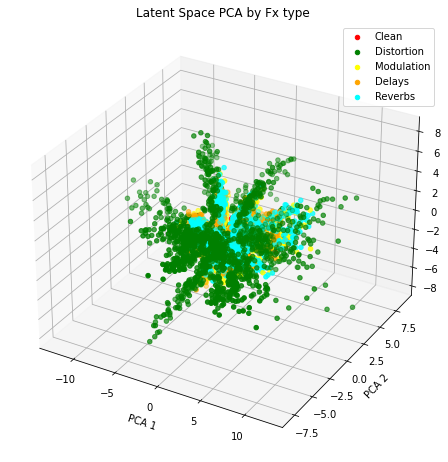

In [7]:
###visualización PCA
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='red', label= fx[0])
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='green', label= 'Distortion')
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='green')#, label= 'Distortion')
ax.scatter3D(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1],X_PCA[2070:2759, 2], c='green')#, label= 'Distortion')
ax.scatter3D(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1],X_PCA[2760:3449, 2], c='yellow', label= 'Modulation')
ax.scatter3D(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1],X_PCA[3450:4139, 2], c='yellow')#, label= 'Modulation')
ax.scatter3D(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1],X_PCA[4140:4829, 2], c='yellow')#, label= 'Modulation')
ax.scatter3D(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1],X_PCA[4830:5519, 2], c='orange', label= 'Delays')
ax.scatter3D(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1],X_PCA[5520:6209, 2], c='orange')#, label= 'Delays')
ax.scatter3D(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1],X_PCA[6210:6899, 2], c='orange')#, label= 'Delays')
ax.scatter3D(X_PCA[6900:7589, 0], X_PCA[6900:7589, 1],X_PCA[6900:7589, 2], c='cyan', label= 'Reverbs')
ax.scatter3D(X_PCA[7590:8279, 0], X_PCA[7590:8279, 1],X_PCA[7590:8279, 2], c='cyan')#, label= 'Reverbs')
ax.scatter3D(X_PCA[8280:, 0], X_PCA[8280:, 1],X_PCA[8280:, 2], c='cyan')# label= 'Reverbs')

plt.legend()
plt.title('Latent Space PCA by Fx type')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

variance: 
[0.04787924 0.03444481]


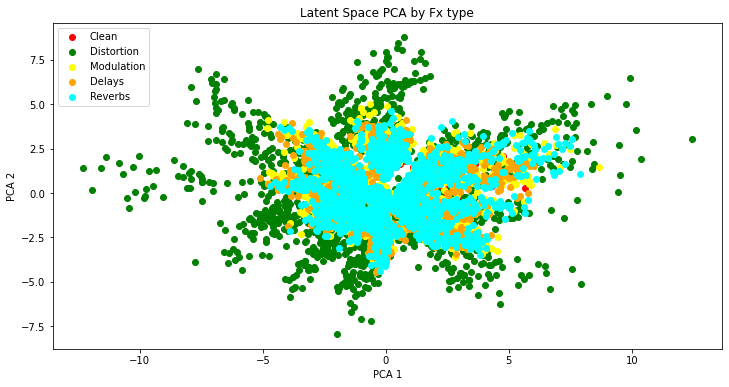

In [8]:
fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0])
print('variance: ')
print(pca.explained_variance_ratio_)


plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='red', label= fx[0])
plt.scatter(X_PCA[690:1379, 0], X_PCA[690:1379, 1],  c='green', label= 'Distortion')
plt.scatter(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1], c='green')#, label= fx[2])
plt.scatter(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1], c='green')#, label= fx[3])
plt.scatter(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1], c='yellow', label= 'Modulation')
plt.scatter(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1], c='yellow')#, label= fx[5])
plt.scatter(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1], c='yellow')#, label= fx[6])
plt.scatter(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1], c='orange', label= 'Delays')
plt.scatter(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1], c='orange')#, label= fx[8])
plt.scatter(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1], c='orange')#, label= fx[9])
plt.scatter(X_PCA[6900:7589, 0], X_PCA[6900:7589, 1], c='cyan', label= 'Reverbs')
plt.scatter(X_PCA[7590:8279, 0], X_PCA[7590:8279, 1], c='cyan')#, label= fx[11])
plt.scatter(X_PCA[8280:, 0], X_PCA[8280:, 1], c='cyan')#, label= fx[12])

plt.legend()
plt.title('Latent Space PCA by Fx type')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [ ]:
###falta hacer lo que sigue por grupo de efectos y cada fx 

variance: 
[0.06686858 0.05218255 0.03773621]


/var/folders/qs/3zzqvkk15cx77yqry0yt8x8h0000gn/T/ipykernel_11770/2222587436.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)#,elev=-0, azim= 0)


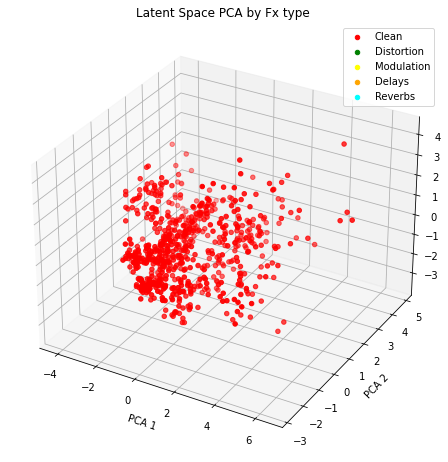

In [11]:
###visualización PCA
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)#,elev=-0, azim= 0)
#X_reduced = PCA(n_components=3).fit_transform(X)

# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 3)

# "transform" the data that you want to reduce to "two components"
X_PCA = pca.fit_transform(latent[0][:689])
print('variance: ')
print(pca.explained_variance_ratio_)

ax.scatter3D(X_PCA[:689, 0], X_PCA[:689, 1],X_PCA[:689, 2], c='red', label= fx[0])
ax.scatter3D(X_PCA[690:1379, 0], X_PCA[690:1379, 1],X_PCA[690:1379, 2], c='green', label= 'Distortion')
ax.scatter3D(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1],X_PCA[1380:2069, 2], c='green')#, label= 'Distortion')
ax.scatter3D(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1],X_PCA[2070:2759, 2], c='green')#, label= 'Distortion')
ax.scatter3D(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1],X_PCA[2760:3449, 2], c='yellow', label= 'Modulation')
ax.scatter3D(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1],X_PCA[3450:4139, 2], c='yellow')#, label= 'Modulation')
ax.scatter3D(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1],X_PCA[4140:4829, 2], c='yellow')#, label= 'Modulation')
ax.scatter3D(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1],X_PCA[4830:5519, 2], c='orange', label= 'Delays')
ax.scatter3D(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1],X_PCA[5520:6209, 2], c='orange')#, label= 'Delays')
ax.scatter3D(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1],X_PCA[6210:6899, 2], c='orange')#, label= 'Delays')
ax.scatter3D(X_PCA[6900:7589, 0], X_PCA[6900:7589, 1],X_PCA[6900:7589, 2], c='cyan', label= 'Reverbs')
ax.scatter3D(X_PCA[7590:8279, 0], X_PCA[7590:8279, 1],X_PCA[7590:8279, 2], c='cyan')#, label= 'Reverbs')
ax.scatter3D(X_PCA[8280:, 0], X_PCA[8280:, 1],X_PCA[8280:, 2], c='cyan')# label= 'Reverbs')

plt.legend()
plt.title('Latent Space PCA by Fx type')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

variance: 
[0.06686869 0.05218261]


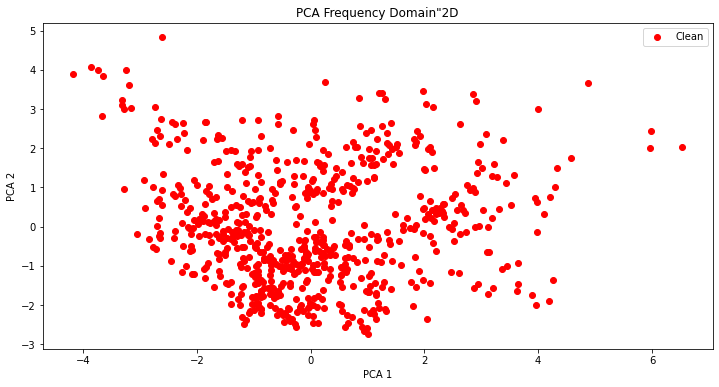

In [10]:
fig = plt.figure(1, figsize=(12, 6))
# create the PCA instance with the number of components to be computed 
pca = PCA(n_components= 2)

X_PCA = pca.fit_transform(latent[0][:689])
print('variance: ')
print(pca.explained_variance_ratio_)

# "transform" the data that you want to reduce to "two components"
plt.scatter(X_PCA[:689, 0], X_PCA[:689, 1], c='red', label= fx[0])
#plt.scatter(X_PCA[690:1379, 0], X_PCA[690:1379, 1], c='green', label= fx[1])
#plt.scatter(X_PCA[1380:2069, 0], X_PCA[1380:2069, 1], c='blue', label= fx[2])
#plt.scatter(X_PCA[2070:2759, 0], X_PCA[2070:2759, 1], c='red', label= fx[3])
#plt.scatter(X_PCA[2760:3449, 0], X_PCA[2760:3449, 1], c='yellow', label= fx[4])
#plt.scatter(X_PCA[3450:4139, 0], X_PCA[3450:4139, 1], c='black', label= fx[5])
#plt.scatter(X_PCA[4140:4829, 0], X_PCA[4140:4829, 1], c='slategrey', label= fx[6])
#plt.scatter(X_PCA[4830:5519, 0], X_PCA[4830:5519, 1], c='orange', label= fx[7])
#plt.scatter(X_PCA[5520:6209, 0], X_PCA[5520:6209, 1], c='pink', label= fx[8])
#plt.scatter(X_PCA[6210:6899, 0], X_PCA[6210:6899, 1], c='brown', label= fx[9])
#plt.scatter(X_PCA[6900:7589, 0], X_PCA[6900:7589, 1], c='cyan', label= fx[10])
#plt.scatter(X_PCA[7590:8279, 0], X_PCA[7590:8279, 1], c='lightgreen', label= fx[11])
#plt.scatter(X_PCA[8280:, 0], X_PCA[8280:, 1], c='indigo', label= fx[12])

plt.legend()
plt.title('PCA Frequency Domain"2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()